Исходные данные:

$L = 5$м

$m = 1$кг

$ g(t) = 9{.}81 + 0{.}05 \sin(2\pi t) $

Система ДАУ
$$
m\ddot{x} = -\frac{1}{L} x T,
$$
$$
m\ddot{y} = -\frac{1}{L} y T - mg(t),
$$
$$
x^2+y^2=L^2
$$

Решение ДАУ осуществим при помощи метода CROS (Альшин и др., 2006)

В данном методе уравнение вида $$ \mathbf{M} \frac{\mathbf{du}}{dt} = \mathbf{F(u)} $$
$$
\mathbf{u}_{i+1} = \mathbf{u}_{i} + \tau  Re \left( {\zeta} \right)
$$
где $\zeta$ получается в результате решения системы уравнений:
$$
    \left(\mathbf{M} - \alpha \tau \mathbf{J(u}_{i}) {\zeta} \right) = \mathbf{F(u}_{i})
$$

где $\alpha = \frac{1+i}{2}$, а $\mathbf{J}$ - матрица Якоби векторной функции $\mathbf{F(u)}$ в точке $\mathbf{u}_i$

Поскольку система неавтономная ввиду зависимости ускорения от времени $g(t)$, для получения точности метода $O(\tau ^2)$ имеет смысл автомизировать систему.
Для автомизации и понижения порядка системы введем замену переменных (для корректности понимания следует отметить, что сила нятяжения T не исключается, а просто переименовывается):
$$
u_1 = x \\
u_2 = y \\
u_3 = \dot{x} \\
u_4 = \dot{y} \\
u_5 = t \\
u_6 = T
$$

Тогда исходная система примет вид 

$$
\dot{u}_1 = u_3 \\
\dot{u}_2 = u_4 \\
\dot{u}_3 = -\frac{1}{mL} u_1 u_6 \\
\dot{u}_4 = -\frac{1}{mL} u_2 u_6 - g(u_5) \\
\dot{u}_5 = 1 \\
0 = u_1^2 + u_2^2 -L^2
$$

In [32]:
m = 1; 
L = 5;
g(t) = 9.81 + 0.05*sin(2*π*t)

function pendulum(u)
    F = similar(u);
    F[1] = u[3];
    F[2] = u[4];
    F[3] = - 1 / (m*L) * u[1] * u[6]
    F[4] = - 1 / (m*L) * u[2] * u[6] - g(u[5]);
    F[5] = 1;
    F[6] = u[1]^2 + u[2]^2 - L^2; 
    return F
end

pendulum (generic function with 1 method)

Для рассчета Якобиана воспользуемся модулем `ForwardDiff.jl`, матричное умножение и обращение матрицы будет осуществлятся встроенными средствами `Julia`. Построение графиков при помощи `PyPlot.jl`

In [33]:
# using Pkg; Pkg.add("PyPlot"); Pkg.add("ForwardDiff");
using PyPlot, ForwardDiff, LinearAlgebra

In [34]:
"""Функция для решения автономной системы ДАУ
func - функция, описывающая правую часть ДАУ
u0 - начальное состояние системы
dt - временной шаг
tspan - интервал интегрирования
NN - количество дифференциальных уравнений
"""
function solveCROS(func, u0, dt, tspan, NN)
    tt = tspan[1]:dt:tspan[2];
    u = Matrix{Float64}(undef, length(tt), length(u0));
    u[1,:] = u0;

    MM = length(u0) - NN;
    E = diagm(vcat(ones(NN), zeros(MM)));
    α = (1+1im)/2;

    for i in 2:length(tt)
        J = ForwardDiff.jacobian(func, u[i-1,:])
        k = (E-α*dt*J)\func(u[i-1,:])
        u[i,:] = u[i-1, :] + dt * real.(k);
    end
    return (tt, u)
end

solveCROS

In [47]:
dt = 0.001;
u0 = [3.0, -4.0, 0.0, 0.0, 0.0, 0.0];
tspan = [0, 2.0]
(tt, u) = solveCROS(pendulum, u0, dt, tspan, 5)

(0.0:0.001:2.0, [3.0 -4.0 … 0.0 0.0; 2.9999976456 -4.0000017658 … 0.001 7.848251327412286; … ; -2.783112575949361 -4.153828045857256 … 1.9989999999998906 7.538647641601497; -2.7845575401166798 -4.1528595367181325 … 1.9999999999998905 7.540818604483046])

График перемещений

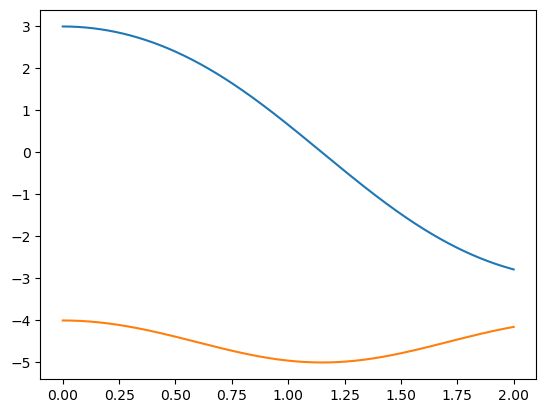

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000A83572E0>

In [48]:
plot(tt, u[:,1])
plot(tt, u[:,2])

График $ \sqrt{x^2(t)+y^2(t)} $ 

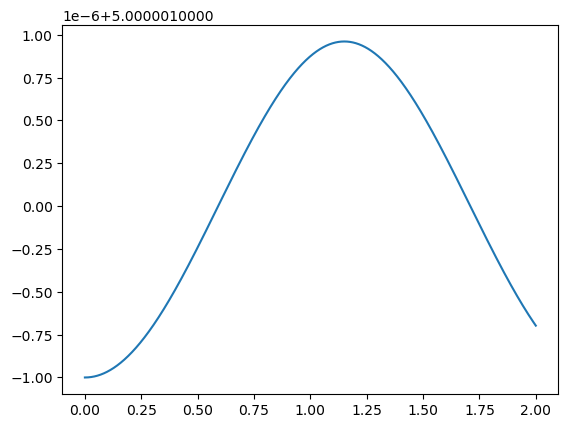

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000A83ED100>

In [49]:
plot(tt, sqrt.(u[:,1].^2 + u[:,2].^2))

Решение на интервале [0,100]

In [50]:
tspan = [0, 100.0]
(tt, u) = solveCROS(pendulum, u0, dt, tspan, 5)

(0.0:0.001:100.0, [3.0 -4.0 … 0.0 0.0; 2.9999976456 -4.0000017658 … 0.001 7.848251327412286; … ; -0.6602645673507576 -4.956215233836373 … 99.99900000011343 5.976310666681663; -0.6559716295749911 -4.956785246046211 … 100.00000000011343 5.975489922303506])

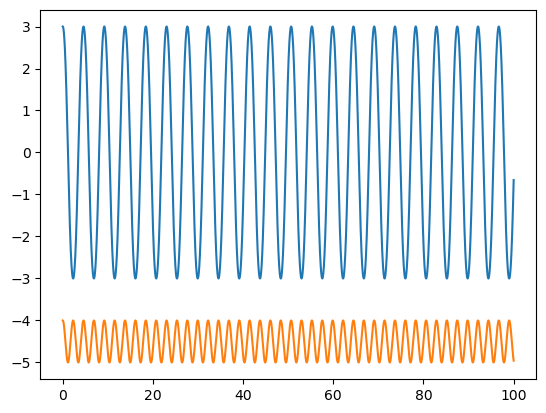

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001D17250>

In [51]:
plot(tt, u[:,1])
plot(tt, u[:,2])

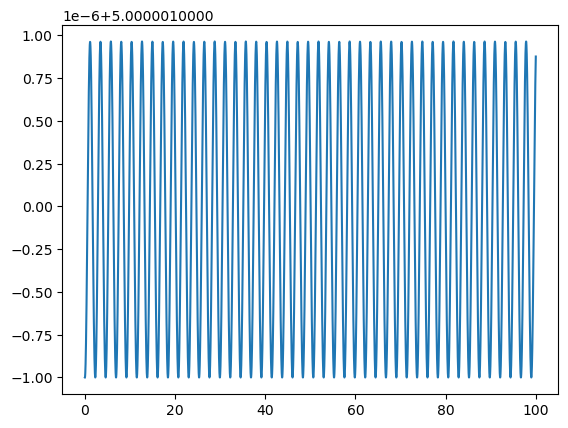

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001B3C430>

In [52]:
plot(tt, sqrt.(u[:,1].^2 + u[:,2].^2))

Из полученного решения следует, что длина стержня несколько изменяется в процессе колебаний, что не соответствет действительности. Это обусловленно погрешностью численного метода. Ошибка решения составляет $\varepsilon \approx 10^{-6}$ При уменьшении шага до 0.001 ошибка соствит $\varepsilon \approx 10^{-8}$, что соответствует точности метода $O(\tau^2)$

**Используемая литература:**

A. Б. Альшин, Е. А. Альшина, Н. Н. Калиткин, А. Б. Корягина, Схемы Розенброка с комплексными коэффициентами для жестких и дифференциально-алгебраических систем, Ж. вычисл. матем. и матем. физ., 2006, том 46, номер 8, 1392–1414